# **Analysis of Adif data**
### **Objective of this Notebook:** Analyze and detect the hours that most trains goes from the Tarragona's port

This notebook is focused on analyzing Adif data. The objective is to identify the hours when the most trains depart from Tarragona's port. The analysis aims to provide insights into train periodicit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Read the data
data = pd.read_excel('./adif-data-mercancias.xlsx')

## Delete headers
data = data.iloc[3:]
data = data.iloc[:, :-4]

# Rename the columns
data.columns = ['Date', 'Month', 'Hour', 'Origin', 'Destination']

# Get only the rows that have in Destination the word 'TARRAGONA'
data = data[data['Destination'].str.contains('TARRAGONA')]

# Reset the index
data = data.reset_index(drop=True)

data

,Date,Month,Hour,Origin,Destination
0,2023-01-02 00:00:00,ENERO,06:57,BARCELONA-CAN TUNIS,TARRAGONA-MERCADERIES
1,2023-01-02 00:00:00,ENERO,07:22,ZARAGOZA-PLAZA,TARRAGONA-MERCADERIES
2,2023-01-02 00:00:00,ENERO,11:15,CASTELLBISBAL,TARRAGONA-MERCADERIES
3,2023-01-02 00:00:00,ENERO,12:43,ELS MONJOS,TARRAGONA-MERCADERIES
4,2023-01-02 00:00:00,ENERO,14:28,MONTORNES-BUTANO,TARRAGONA-MERCADERIES
...,...,...,...,...,...
2808,2023-12-29 00:00:00,DICIEMBRE,11:30,CONSTANTI,TARRAGONA-MERCADERIES
2809,2023-12-29 00:00:00,DICIEMBRE,13:47,ELS MONJOS,TARRAGONA-MERCADERIES
2810,2023-12-29 00:00:00,DICIEMBRE,17:00,MONTORNES-BUTANO,TARRAGONA-MERCADERIES
2811,2023-12-29 00:00:00,DICIEMBRE,17:31,SARIÑENA,TARRAGONA-MERCADERIES


In [3]:
## Round the hour to the nearest 15 minutes
# Group all the rows by Hour, rounded by 15 minutes
data['Hour'] = pd.to_datetime(data['Hour'])

# Round to nearest 15 minutes
data['Hour'] = data['Hour'].dt.round('H')

# If you want to keep only the time part
data['Hour'] = data['Hour'].dt.time

data

/tmp/ipykernel_6653/3803657517.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Hour'])
/tmp/ipykernel_6653/3803657517.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Hour'] = data['Hour'].dt.round('H')


,Date,Month,Hour,Origin,Destination
0,2023-01-02 00:00:00,ENERO,07:00:00,BARCELONA-CAN TUNIS,TARRAGONA-MERCADERIES
1,2023-01-02 00:00:00,ENERO,07:00:00,ZARAGOZA-PLAZA,TARRAGONA-MERCADERIES
2,2023-01-02 00:00:00,ENERO,11:00:00,CASTELLBISBAL,TARRAGONA-MERCADERIES
3,2023-01-02 00:00:00,ENERO,13:00:00,ELS MONJOS,TARRAGONA-MERCADERIES
4,2023-01-02 00:00:00,ENERO,14:00:00,MONTORNES-BUTANO,TARRAGONA-MERCADERIES
...,...,...,...,...,...
2808,2023-12-29 00:00:00,DICIEMBRE,12:00:00,CONSTANTI,TARRAGONA-MERCADERIES
2809,2023-12-29 00:00:00,DICIEMBRE,14:00:00,ELS MONJOS,TARRAGONA-MERCADERIES
2810,2023-12-29 00:00:00,DICIEMBRE,17:00:00,MONTORNES-BUTANO,TARRAGONA-MERCADERIES
2811,2023-12-29 00:00:00,DICIEMBRE,18:00:00,SARIÑENA,TARRAGONA-MERCADERIES


/tmp/ipykernel_6653/2457073487.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hour_counts.index = pd.to_datetime(hour_counts.index.astype(str)).strftime('%-H')


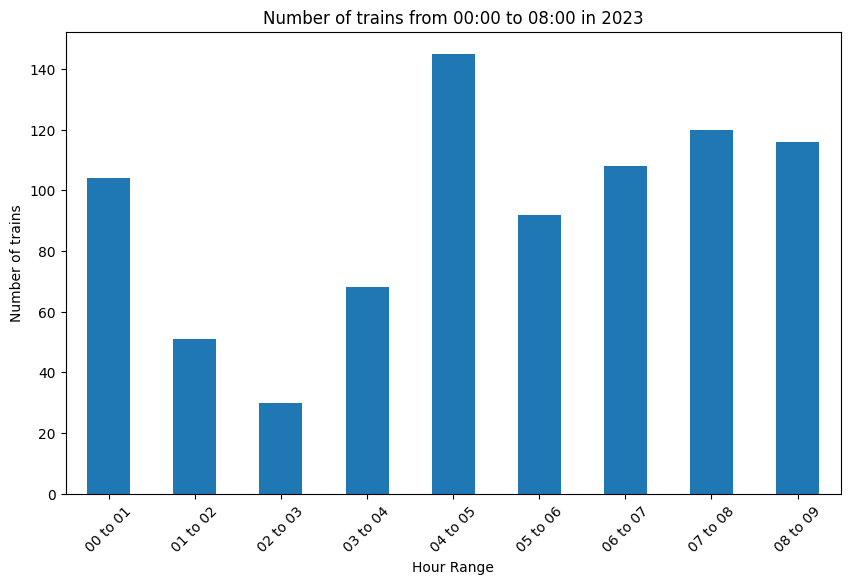

In [4]:
# Get only the data that is between 00:00 and 08:00
filtered_data = data[(data['Hour'] >= pd.to_datetime('00:00:00').time()) & 
                     (data['Hour'] <= pd.to_datetime('08:00:00').time())]

# Group by 'Hour' and count the number of rows for each hour
hour_counts = filtered_data.groupby('Hour').size()

# Convert index to datetime and format to hour numbers
hour_counts.index = pd.to_datetime(hour_counts.index.astype(str)).strftime('%-H')

# Create hour range labels
hour_labels = [f'0{i} to 0{i+1}' for i in range(9)]

# Plot the counts
plt.figure(figsize=(10,6))
hour_counts.plot(kind='bar')
plt.xlabel('Hour Range')
plt.ylabel('Number of trains')
plt.title('Number of trains from 00:00 to 08:00 in 2023')
plt.xticks(range(len(hour_labels)), hour_labels, rotation=45)  # Use new labels with 45-degree rotation
plt.show()